<a href="https://colab.research.google.com/github/davidg335/degree_distribtions_SNAP/blob/main/Buckling_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

length =[8, 11.75, 15]
p_meas =[47.66, 20.51, 10.19]
s_error=[	0.3696636776, 0.02933417507,	0.2699594162]

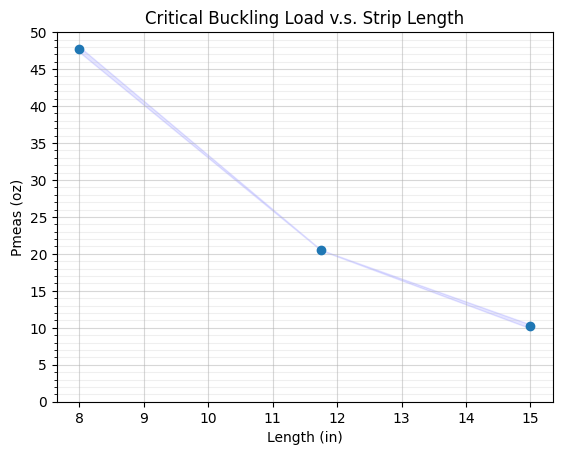

In [2]:
# setting up the plot

fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(length,p_meas,"o")
plt.xlabel("Length (in)")
plt.ylabel("Pmeas (oz)")
plt.title("Critical Buckling Load v.s. Strip Length")

#axis lengths
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 50])

#ticks
plt.xticks(np.arange(8, 17, 1))
plt.yticks(np.arange(0, 51, 5))

#grid lines
minor_grid=np.arange(0,51,1)
major_grid=np.arange(0,51,5)

ax.set_yticks(major_grid, minor=False)
ax.set_yticks(minor_grid, minor=True)

ax.tick_params(axis='both', which="major",grid_alpha=.5)
ax.tick_params(axis='both', which="minor",grid_alpha=.2)

#CI
lower=[]
upper=[]
for i in range(3):
  lower.append(p_meas[i]-s_error[i])
  upper.append(p_meas[i]+s_error[i])

ax.fill_between(length, lower, upper, color='b', alpha=.1)
ax.grid(which='both')


In [3]:
#set plot type (linear or log)
plt_type="linear"

Coefficients: y=-5.4009168081494074x+88.68061969439731
[45.47328522920205, 25.219847198641773, 7.6668675721561925]


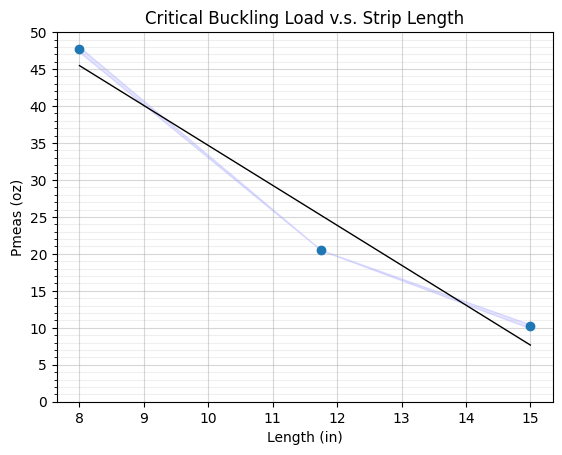

In [4]:
fit_y_vals=[]
if plt_type=="linear":

  m, b = np.polyfit(length, p_meas, deg=1)

  xseq = np.linspace(8,15, num=100)

  # Plot regression line
  ax.plot(xseq, b + m * xseq, color="k", lw=1)
  for x in length:
    fit_y_vals.append(b+m*x)
  print(f"Coefficients: y={m}x+{b}")

else:
  from scipy.optimize import curve_fit

  def log(x,a,b):
      return a*np.log(x)+ b


  popt, pcov = curve_fit(log, length, p_meas)

  xseq = np.linspace(8,15, num=100)

  #plot logarithmic fit function
  ax.plot(xseq, log(xseq,popt[0],popt[1]), color="k", lw=1)
  for x in length:
    fit_y_vals.append(log(x,popt[0],popt[1]))

  print(f"Coefficients: y={popt[0]}log(x) +{popt[1]}")

print(fit_y_vals)
fig

In [5]:
#inputs: measured data points, model fit data points for pmeas values
def mae(actual,fit):
  sum_error=0
  for i in range(len(actual)):
    sum_error+=(abs(actual[i]-fit[i]))
  return sum_error/len(actual)


print(f"Error for {plt_type}: {mae(p_meas,fit_y_vals)}")


Error for linear: 3.139898132427842
